<a href="https://colab.research.google.com/github/NiccoloSalvi/naml/blob/main/handwriting_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwriting recognition

## Data import and visualization

Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt('sample_data/mnist_train_small.csv', delimiter=',')
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector

In [ ]:
labels_full = data[:,0]
A_full = data[:,1:].transpose() # on each colums there is an image
labels_full.shape, A_full.shape

((20000,), (784, 20000))

Visualize the first 30 pictures with the corresponding labels

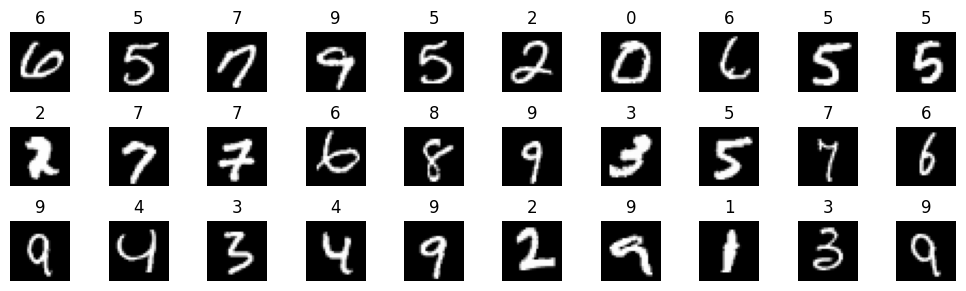

In [ ]:
fig, axs = plt.subplots(3, 10, figsize=(10, 3))
axs = axs.reshape(-1) # converts an array to a 1D array by flattening it

for i in range(30):
    axs[i].imshow(A_full[:, i].reshape(28, 28), cmap="gray")
    axs[i].set_title(int(labels_full[i]))
    axs[i].axis('off')  # Remove axes ticks and labels


plt.tight_layout()  # Adjust spacing between subplots
plt.show()

Visualize the first 30 pictures corresponding to the digit "9"

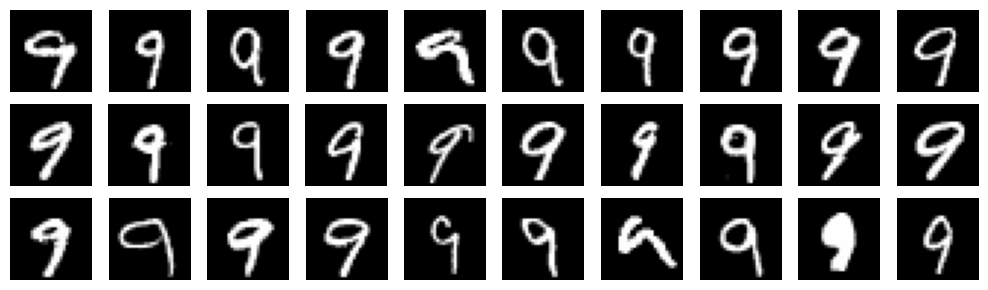

In [ ]:
fig, axs = plt.subplots(3, 10, figsize=(10, 3))
axs = axs.reshape(-1) # converts an array to a 1D array by flattening it

# Create a Boolean mask to select only the images corresponding to the digit '9'.
nine_digit_mask = labels_full == 9
# Select the images corresponding to the digit '9' using the Boolean mask.
nine_A_full = A_full[:, nine_digit_mask]

for i in range(30):
    axs[i].imshow(nine_A_full[:, i].reshape(28, 28), cmap="gray")
    axs[i].axis('off')  # Remove axes ticks and labels

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

In [ ]:
nine_digit_mask = labels_full == 9
zero_digit_mask = labels_full == 0

reduced_labels = labels_full[nine_digit_mask | zero_digit_mask]
reduced_A = A_full[:, nine_digit_mask | zero_digit_mask]

Plot the first 30 training images.

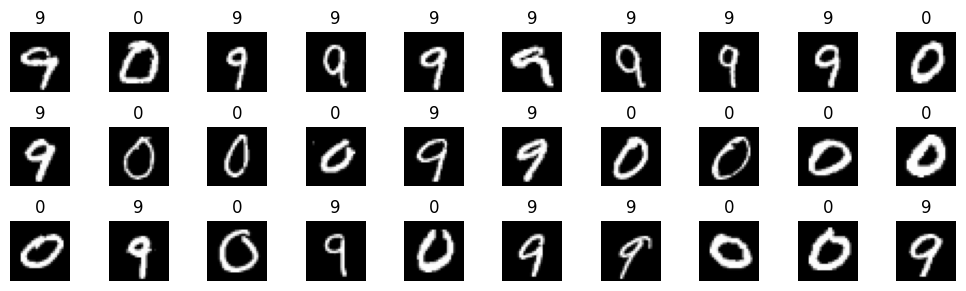

In [ ]:
fig, axs = plt.subplots(3, 10, figsize=(10, 3))
axs = axs.reshape(-1)

for i in range(30):
    axs[i].imshow(reduced_A[:, i].reshape(28, 28), cmap="gray")
    axs[i].set_title(int(reduced_labels[i]))
    axs[i].axis('off')

plt.tight_layout()
plt.show()

Compute and visualize the average of the training data

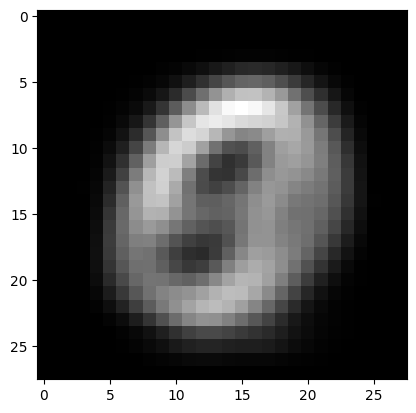

In [ ]:
A_mean = np.mean(reduced_A, axis=1)
plt.imshow(A_mean.reshape(28, 28), cmap="gray")

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

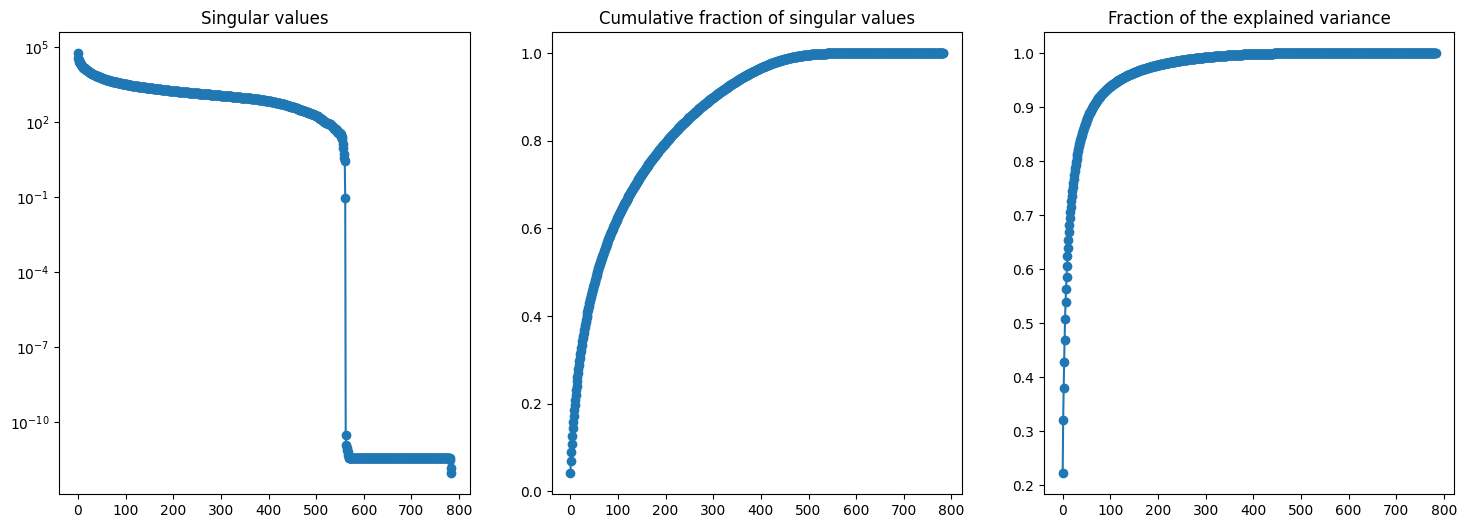

In [ ]:
A_centered = reduced_A - A_mean[:, None]

U, S, VT = np.linalg.svd(A_centered, full_matrices=False)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].plot(S, 'o-')
axs[0].set_yscale("log")
axs[0].set_title("Singular values")

axs[1].plot(np.cumsum(S) / np.sum(S), 'o-')
axs[1].set_title("Cumulative fraction of singular values")

axs[2].plot(np.cumsum(S**2) / np.sum(S**2), 'o-')
axs[2].set_title("Fraction of the explained variance")

plt.show()

Visualize the first 30 principal axes

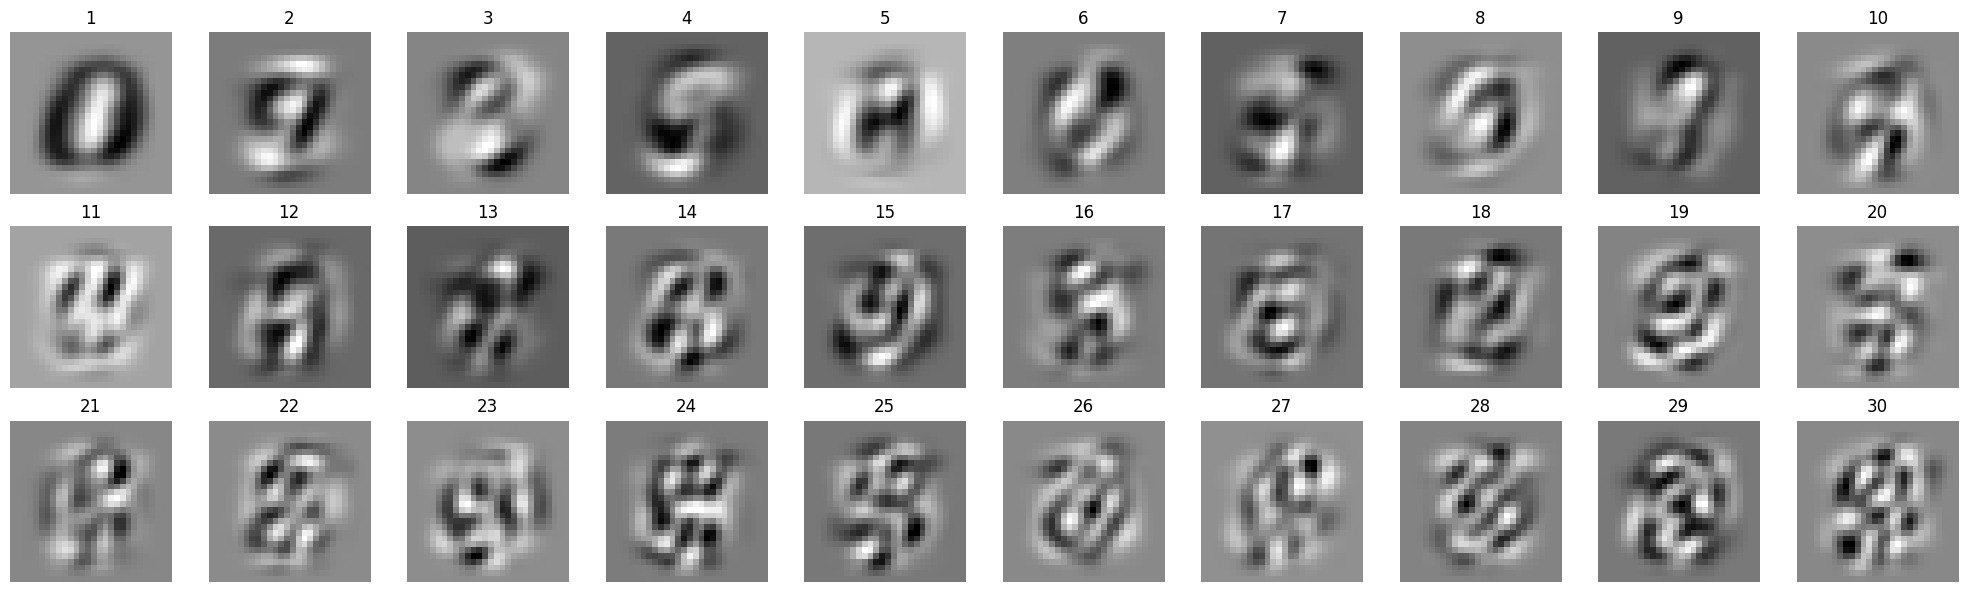

In [ ]:
fig, axs = plt.subplots(3, 10, figsize=(20, 6))
axs = axs.reshape(-1)

for i in range(30):
    axs[i].imshow(U[:, i].reshape(28, 28), cmap="gray")
    axs[i].axis('off')
    axs[i].set_title(str(i+1))

plt.tight_layout()
plt.show()

Compute the first two principal components corresponding to the first image

In [ ]:
pc1_1 = np.inner(reduced_A[:, 0] - A_mean, U[:, 0])
pc1_2 = np.inner(reduced_A[:, 0] - A_mean, U[:, 1])

print(pc1_1)
print(pc1_2)

-529.0964148086608
-580.8608501624369


Define a matrix corresponding all the principal components of all the images, and check the result of the previous point

In [ ]:
pc = U.T @ A_centered
first_pc = pc[0, :] # first principal component of each image
second_pc = pc[1, :] # second principal component of each image

print(first_pc[0]) # first pc of first image
print(second_pc[0]) # second pc of first image

-529.0964148086607
-580.8608501624367


Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.

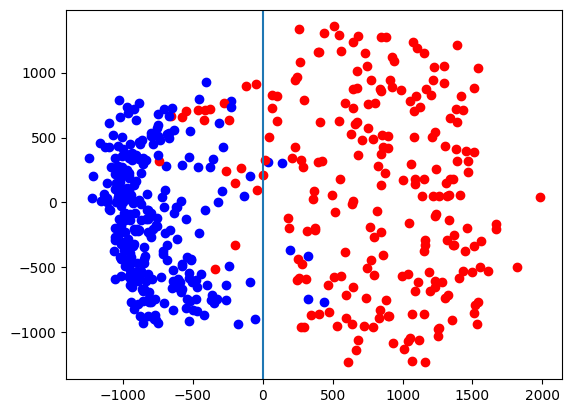

In [ ]:
for i in range(500):
    if reduced_labels[i] == 0:
        color = "red"
    else:
        color = "blue"

    plt.scatter(pc[0, i], pc[1, i], marker='o', color=color)

threshold = 0
plt.axvline(threshold)

plt.show()

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.

In [ ]:
data_test = np.genfromtxt('sample_data/mnist_test.csv', delimiter=',')
labels_full_test = data_test[:, 0]
A_full_test = data_test[:,1:].transpose()

mask = np.logical_or(labels_full_test == 0, labels_full_test == 9)
A_test = A_full_test[:, mask]
labels_test = labels_full_test[mask]

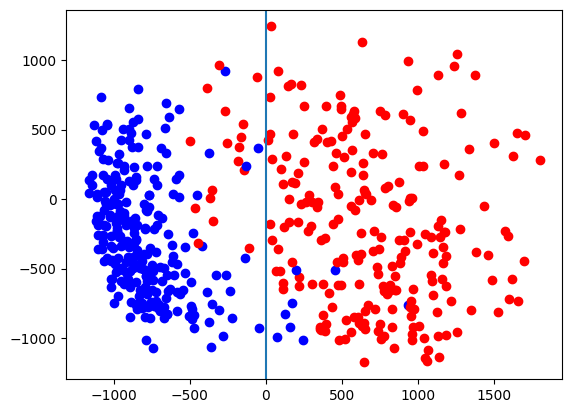

In [ ]:
A_test_mean = np.mean(A_test, axis=1)
pc_test = U.T @ (A_test - A_test_mean[:, None])

for i in range(500):
    if (labels_test[i] == 0):
        color = "red"
    else:
        color = "blue"

    plt.scatter(pc_test[0, i], pc_test[1, i], marker='o', color=color)

threshold = 0
plt.axvline(threshold)

plt.show()

confusionMatrix.avif

In [145]:
labels_predicted = np.empty(labels_test.shape).astype(int)

labels_predicted[pc_test[0, :] > threshold] = 0
labels_predicted[pc_test[0, :] <= threshold] = 9

true_0 = np.sum(np.logical_and(labels_test == 0, labels_predicted == 0))
false_0 = np.sum(np.logical_and(labels_test == 9, labels_predicted == 0))
true_9 = np.sum(np.logical_and(labels_test == 9, labels_predicted == 9))
false_9 = np.sum(np.logical_and(labels_test == 0, labels_predicted == 9))

print("true 0: ", true_0)
print("false 0: ", false_0)
print("true 9: ", true_9)
print("false 9: ", false_9)

accuracy = (true_0 + true_9) / (true_0 + false_0 + true_9 + false_9)
print("accuracy: ", round(accuracy, 2))

true 0:  930
false 0:  30
true 9:  979
false 9:  50
accuracy:  0.96
